## Time Series Prediction using LSTM

### Download Data
Link: https://datamarket.com/data/set/2324/daily-minimum-temperatures-in-melbourne-australia-1981-1990#!ds=2324&display=line

#### Description
Daily minimum temperatures in Melbourne, Australia, 1981-1990

Units: Degrees Celcius

#### Steps before loading
- Rename the column name with temprature values to "Temprature"
- In the last, there is one extra row in the data, remove it by opening the file and save it again.
- There are some values in Temprature column which have a "?" before them, they will give error, remove "?" before them and save the file
- If you don't want to do these steps, just load the data file given by Great Learning.

#### Mount google drive

In [1]:
from google.colab import drive
drive.mount('/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive/


#### Change your present working directory

In [6]:
import os
os.chdir('/gdrive/My Drive/')
os.listdir()

['company details for campus placement.xls.gdoc',
 'akhilesh_resume_bangalore.gdoc',
 'ashish(2).gdoc',
 'brajesh-resume-STEM_STAG SOFTWARE.gdoc',
 'Dev_Resume_Fresher(2).gdoc',
 'manish1.gdoc',
 'brijesh tripathi(2).gdoc',
 'Resume of Mr. Shahid Shakil.docx',
 '004.jpg',
 '003.jpg',
 'SCRUMstudy-SBOK-Guide-2016.pdf',
 'SVHN_single_grey1.h5',
 'Classroom',
 'DogBreed_Classification',
 'IMG_20190510_175145.jpg',
 'xdoimgqR1QOl6Lj91318449784320614419.jpg',
 'Colab Notebooks',
 'Shahid_Shakil_Resume.docx',
 'Shahid Shakil MS BA Fall 2020 List-1.xlsx',
 'Shahid Shakil MS BA Fall 2020 List-1.gsheet',
 'a1fso2ep9nbsual_UserUpload_Net.pdf',
 'csb19unegartnsi_UserUpload_Net.pdf',
 'th2asdebv19oauo_UserUpload_Net.pdf',
 'brdta1zhi9newra_UserUpload_Net.pdf',
 'The_Economist_UK_-_16_11_2019.pdf',
 'The_Economist_-_November_02_2019_UserUpload_Net.pdf',
 'The_Economist_USA_-_23_11_2019.pdf',
 'salt-data',
 'Shahid__Resume.pdf',
 'Rebecca Solnit - Best American Essays 2019-Mariner Books (2019).epub'

### Load your data file

In [0]:
import pandas as pd
df = pd.read_csv('daily-minimum-temperatures-in-me.csv',index_col='Date')

#### Plot data

In [9]:
df.head(5)

,Temperature
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


#### Descibe your dataframe

In [10]:
df.describe()

,Temperature
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


#### Check for null values

In [11]:
df.isnull().any(axis=1).sum()

0

#### Drop null values

In [12]:
# Since there are no null values it won't drop anything but writing the code anyway
df.dropna(inplace=True)
df.isnull().sum()

Temperature    0
dtype: int64

#### Get the representation of the distribution of data in the form of histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efd2163bfd0>]],
      dtype=object)

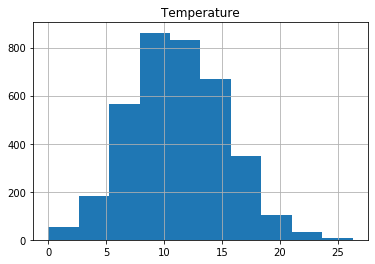

In [13]:
df.hist()

#### Check the maximum and minimum values

In [15]:
import numpy as np
print('Min Value', np.min(df))
print('Max Value', np.max(df))

Min Value Temperature    0.0
dtype: float64
Max Value Temperature    26.3
dtype: float64


### Normalize the data

In [0]:
dataset = df.astype('float32')

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(dataset)

#### Check the maximum and minimum values of scaled data

In [18]:
print('Min Value', np.min(df))
print('Max Value', np.max(df))

Min Value Temperature    0.0
dtype: float64
Max Value Temperature    26.3
dtype: float64


#### Look into some of the scaled values

In [19]:
print(scaled[:10])

[[0.7870723 ]
 [0.68060837]
 [0.71482889]
 [0.55513311]
 [0.60076048]
 [0.60076048]
 [0.60076048]
 [0.66159696]
 [0.82889733]
 [0.7604563 ]]


### Split data into Training and Testing

In [0]:
train_size = int(len(scaled) * 0.70)
test_size = len(scaled - train_size)
train, test = scaled[0:train_size, :], scaled[train_size: len(scaled), :]

#### Print train and test size

In [21]:
print('train: {}\ntest: {}'.format(len(train), len(test)))

train: 2555
test: 1095


## Create the sequential data
Map the temprature at a particular time t to the temprature at time t+n, where n is any number you define.

For example: to map tempratures of consecutive days, use t+1, i.e. loop_back = 1

#### Define your function to create dataset

In [0]:
def create_dataset(dataset, look_back=1):
    print(len(dataset), look_back)
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataset[i + look_back, 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

#### Use function to get training and test set

In [23]:
look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

2555 1
1095 1


#### Transform the prepared train and test input data into the expected structure using numpy.reshape()

In [24]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)
print(X_test.shape)

(2553, 1, 1)
(1093, 1, 1)


## Define Model

### Define sequntial model, add LSTM layer and compile the model

In [27]:
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

### Summarize your model

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (1, 4)                    96        
_________________________________________________________________
dense_1 (Dense)              (1, 1)                    5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [29]:
model.fit(X_train, y_train, epochs=10, batch_size=batch_size, verbose=1, shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





2553/2553 [==============================] - 5s 2ms/step - loss: 0.0194
Epoch 2/10
2553/2553 [==============================] - 4s 2ms/step - loss: 0.0132
Epoch 3/10
2553/2553 [==============================] - 4s 2ms/step - loss: 0.0114
Epoch 4/10
2553/2553 [==============================] - 4s 2ms/step - loss: 0.0107
Epoch 5/10
2553/2553 [==============================] - 4s 2ms/step - loss: 0.0103
Epoch 6/10
2553/2553 [==============================] - 4s 2ms/step - loss: 0.0103
Epoch 7/10
2553/2553 [==============================] - 4s 2ms/step - loss: 0.0103
Epoch 8/10
2553/2553 [==============================] - 4s 2ms/step - loss: 0.0103
Epoch 9/10
2553/2553 [==============================] - 4s 2ms/step - loss: 0.0103
Epoch 10/10
2553/2553 [==============================] - 4s 2ms/step - loss: 0.0102


## Make Predictions and Evaluate your model

In [30]:
import math
from sklearn.metrics import mean_squared_error

trainPredict = model.predict(X_train, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(X_test, batch_size=batch_size)
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])
trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 2.62 RMSE
Test Score: 2.50 RMSE


## Plot the results

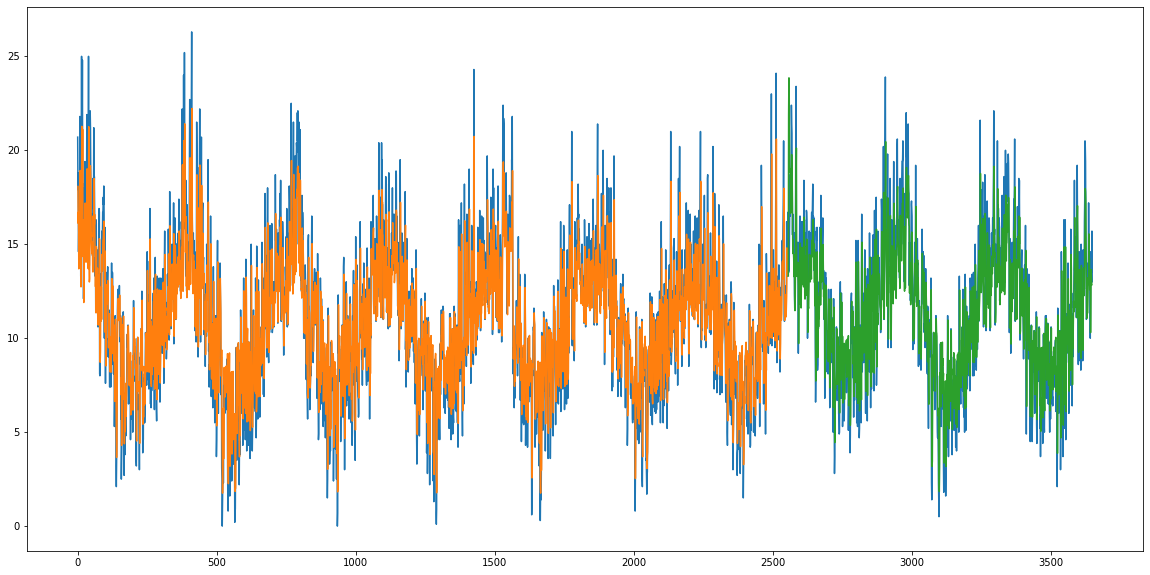

In [32]:
import matplotlib.pyplot as plt
trainPredictPlot = np.empty_like(scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(scaled)-1, :] = testPredict
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(scaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()